# ECCM demonstrations 

## Imports 

In [1]:
import numpy as np 
import scipy.constants as spc
import matplotlib.pyplot as plt 
from matplotlib import ticker
from matplotlib.gridspec import GridSpec
import matplotlib.colors as colors

import sys
sys.path.append('..')
import eccm 
import mrtm

plt.style.use('~/Documents/Research/Akins.mplstyle')


## Saturn

Generating a model for Saturn, starting with a Cassini radio occultation profile and assuming deep abundances corresponding to 10x enrichment (3x for N)

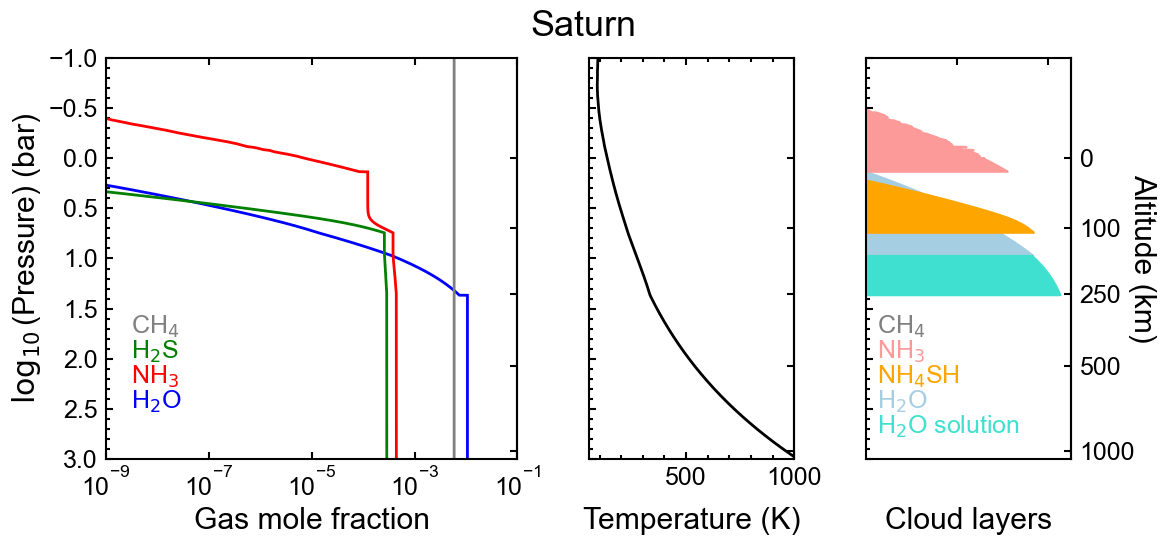

In [2]:
p_grid = np.logspace(2, 9, 10000)
saturn_gravity = 10.44  # m/s2 


# Load RO profile 
saturn_ro = np.loadtxt('../data/ro_profiles/saturn_cassini_schinder2011.txt', skiprows=3, delimiter=',')
saturn_pressure = saturn_ro[:, 0] * 1e2  # Pa
saturn_temperature = saturn_ro[:, 1]

gases1 = eccm.solar_to_deep_mole_fraction(10) 
gases2 = eccm.solar_to_deep_mole_fraction(3) 

pressure_grid, temperature_grid, altitude_grid, \
x_h2o, x_nh3, x_h2s, x_ch4, x_ph3, x_h2, x_he, \
a_h2osolid, a_h2oliquid, a_h2osolution, \
a_nh3solid, a_nh3liquid, \
a_h2ssolid, a_h2sliquid, \
a_nh4sh, c_nh3h2o, \
a_ch4solid, a_ch4liquid, a_ph3solid  = eccm.eccm(p_grid, saturn_pressure, saturn_temperature, saturn_gravity,
                                                 gases1['H2O'], gases2['NH3'], gases1['H2S'], gases1['CH4'], 0., 0.88, 0.12,
                                                 nh3_rh = 0.7, h2o_rh = 0.7,
                                                 latent_heat_update=True, force_reference_above_pressure=1.*spc.bar)


def p_to_z(x):
    return np.interp(x, np.log10(pressure_grid / spc.bar)[::-1], altitude_grid[::-1])

def z_to_p(x): 
    return np.interp(x, altitude_grid[::-1], np.log10(pressure_grid / spc.bar)[::-1])


gs = GridSpec(1, 3, width_ratios=[2, 1, 1], height_ratios=[1])


fig = plt.figure(figsize=(12, 6)) 
ax = fig.add_subplot(gs[1]) 
ax.plot(temperature_grid, np.log10(pressure_grid / spc.bar), color='k')
ax.set_xlabel('Temperature (K)', labelpad=12)
ax.set_ylim(-1, 3)
ax.set_xlim(50, 1000)
ax.invert_yaxis()
ax.yaxis.set_tick_params(labelcolor='none')
ax.tick_params(right=False, which='both')
secax = ax.secondary_yaxis('right', functions=(p_to_z, z_to_p))
secax.set_yticks([-250, -100, 0, 100, 250, 500, 1000])
secax.tick_params(right=False, which='minor')
secax.yaxis.set_tick_params(labelcolor='none')

ax = fig.add_subplot(gs[0]) 
ax.plot(x_h2o, np.log10(pressure_grid / spc.bar), label='H$_2$O', color='b')
ax.plot(x_nh3, np.log10(pressure_grid / spc.bar), label='NH$_3$', color='r')
ax.plot(x_h2s, np.log10(pressure_grid / spc.bar), label='H$_2$S', color='g')
ax.plot(x_ch4, np.log10(pressure_grid / spc.bar), label='CH$_4$', color='gray')
# ax.plot(x_ph3, np.log10(pressure_grid / spc.bar), label='PH$_3$', color='purple')
ax.set_xlabel('Gas mole fraction')
ax.set_ylabel(r'$\log_{10}$(Pressure) (bar)')
ax.set_xscale('log')
ax.set_xlim(1e-9, 1e-1)
ax.set_ylim(-1, 3)
ax.invert_yaxis()
ax.tick_params(right=False, which='both')
secax = ax.secondary_yaxis('right', functions=(p_to_z, z_to_p))
secax.set_yticks([-250, -100, 0, 100, 250, 500, 1000])
secax.tick_params(right=False, which='minor')
secax.yaxis.set_tick_params(labelcolor='none')
ax.text(3e-9, 2.5, 'H$_2$O', color='b')
ax.text(3e-9, 2.25, 'NH$_3$', color='r')
ax.text(3e-9, 2., 'H$_2$S', color='g')
ax.text(3e-9, 1.75, 'CH$_4$', color='gray')
# ax.text(3e-9, 2.5, 'PH$_3$', color='b')


paired_cmap = plt.get_cmap('Paired')

ax = fig.add_subplot(gs[2]) 
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_h2osolid, label='H$_2$O solid', color=paired_cmap(0))
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_h2oliquid, label='H$_2$O liquid', color=paired_cmap(1))
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_h2osolution, label='H$_2$O solution', color='turquoise')
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_nh3solid, label='NH$_3$ solid', color=paired_cmap(4))
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_nh3liquid, label='NH$_3$ liquid', color=paired_cmap(5))
# ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_h2ssolid, label='H$_2$S solid', color=paired_cmap(2))
# ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_h2sliquid, label='H$_2$S liquid', color=paired_cmap(3))
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_ch4solid, label='CH$_4$ solid', color='gray')
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_ch4liquid, label='CH$_4$ liquid', color='k')
# ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_ph3solid, label='PH$_3$ solid', color='purple')
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_nh4sh, label='NH4SH', color='orange')
ax.set_xlabel('Cloud layers')
ax.set_xscale('log')
ax.set_ylim(-1, 3)
ax.set_xlim(1e-6, 1000)
ax.xaxis.set_tick_params(labelcolor='none')
ax.invert_yaxis()
ax.tick_params(bottom=False, right=False, which='both')
ax.yaxis.set_tick_params(labelcolor='none')
ax.text(3e-6, 2.75, 'H$_2$O solution', color='turquoise')
ax.text(3e-6, 2.5, 'H$_2$O', color=paired_cmap(0))
ax.text(3e-6, 2.25, 'NH$_4$SH', color='orange')
ax.text(3e-6, 2., 'NH$_3$', color=paired_cmap(4))
ax.text(3e-6, 1.75, 'CH$_4$', color='gray')


secax = ax.secondary_yaxis('right', functions=(p_to_z, z_to_p))
secax.set_ylabel('Altitude (km)', rotation=-90, labelpad=15) 
secax.yaxis.set_major_formatter(ticker.ScalarFormatter())
secax.set_yticks([-250, -100, 0, 100, 250, 500, 1000])
secax.tick_params(right=False, which='minor')

fig.suptitle('Saturn', y=0.92, fontsize='x-large')
fig.tight_layout(w_pad=-2) 
fig.savefig('saturn_eccm.png', dpi=300)





## Emission and angular spectrum, atmospheric weighting functions 

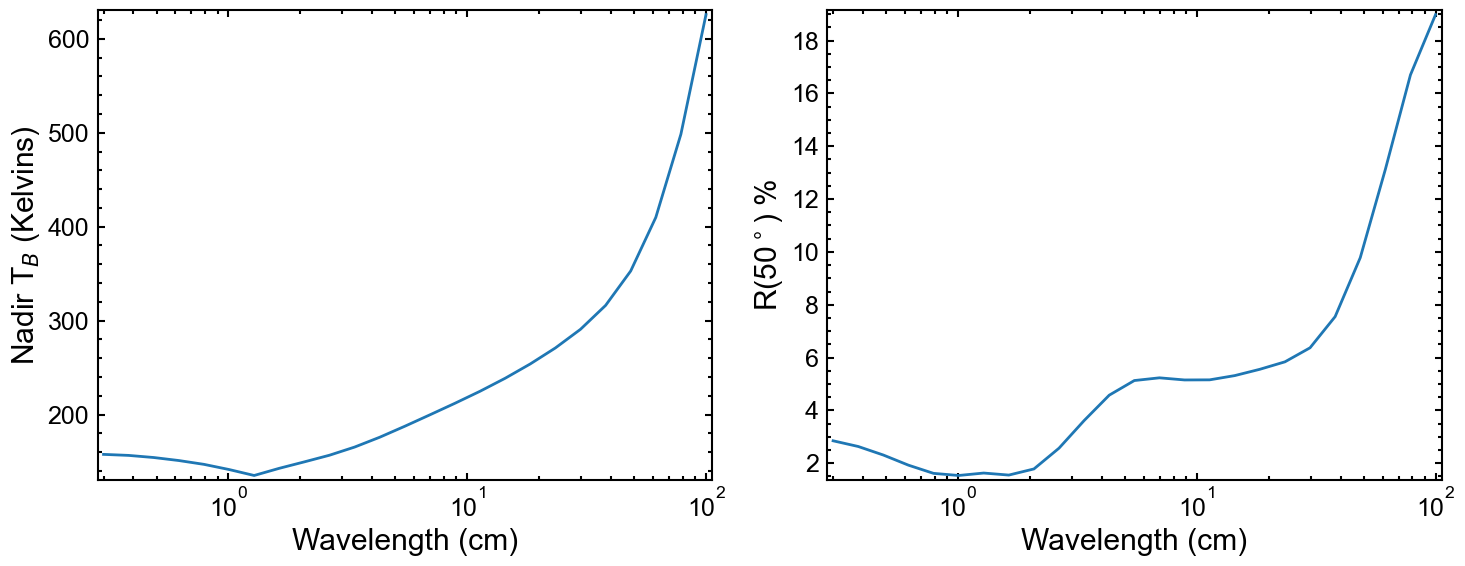

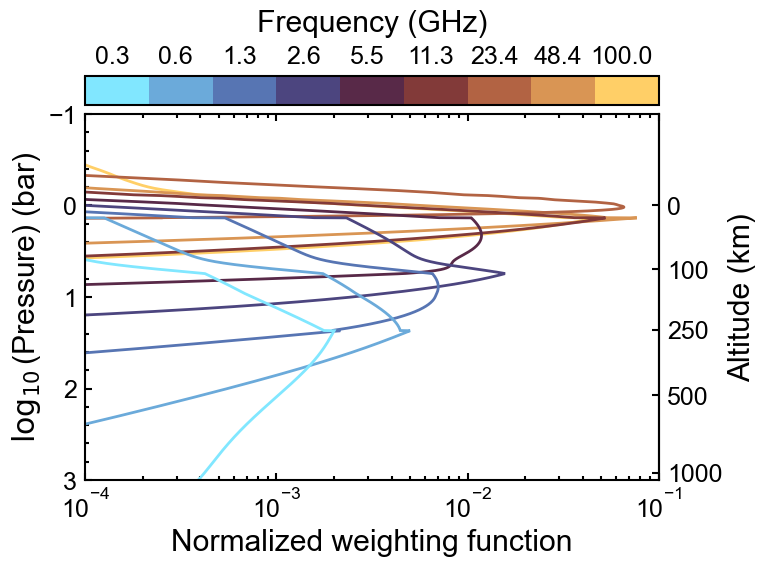

In [3]:
planet_radius = 60268  # Saturn

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
freq_ghz = 3e-1 / np.logspace(np.log10(3e-3), 0, 25)
wave_cm = spc.c / (freq_ghz * 1e9) * 1e2 

incang_deg = 0. 
# Don't need to use the full atmosphere grid
minloc = np.argmin(abs(pressure_grid / spc.bar - 1e-3))
maxloc = np.argmin(abs(pressure_grid / spc.bar - 1000e3))
slc = slice(maxloc, minloc, 3)
full_tau, weight_up, weight_limb, Tup, Tlimb = mrtm.mrtm(freq_ghz, incang_deg, altitude_grid[slc], pressure_grid[slc], temperature_grid[slc], x_h2o[slc], x_nh3[slc], x_h2s[slc], x_ch4[slc], x_ph3[slc], x_h2[slc], x_he[slc], planet_radius)
spec1 = Tup 
incang_deg = 50. 
full_tau, _, _, Tup, Tlimb = mrtm.mrtm(freq_ghz, incang_deg, altitude_grid[slc], pressure_grid[slc], temperature_grid[slc], x_h2o[slc], x_nh3[slc], x_h2s[slc], x_ch4[slc], x_ph3[slc], x_h2[slc], x_he[slc], planet_radius)
spec2 = Tup 
R50 = (spec1 - spec2) / spec1 * 1e2 

ax1.plot(wave_cm, spec1)
ax2.plot(wave_cm, R50)

ax1.set_xlabel('Wavelength (cm)')
ax2.set_xlabel('Wavelength (cm)')
ax1.set_ylabel('Nadir T$_B$ (Kelvins)')
ax2.set_ylabel(r'R(50$^\circ$) %')
ax1.set_xscale('log')
ax2.set_xscale('log')
fig.tight_layout()


fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1) 

# Colormap setup
freqs = freq_ghz[::3]  # Only using every third frequency
n_colors = len(freqs)
cmap = plt.get_cmap('managua_r', n_colors)  # Discrete version of colormap
log_edges = np.logspace(np.log10(freqs.min()) - 0.01, np.log10(freqs.max()) + 0.01, n_colors + 1)
norm = colors.BoundaryNorm(log_edges, ncolors=n_colors)

for i, wup in enumerate(weight_up):
    if not i % 3:
        freq = freq_ghz[i]
        color = cmap(norm(freq))
        ax.semilogx(wup, np.log10(pressure_grid[slc] / spc.bar), color=color)

ax.set_xlabel('Normalized weighting function')
ax.set_ylabel(r'$\log_{10}$(Pressure) (bar)')
ax.set_ylim(-1, 3)
ax.set_xlim(1e-4, 1e-1)
ax.invert_yaxis()
ax.tick_params(right=False, which='both')
secax = ax.secondary_yaxis('right', functions=(p_to_z, z_to_p))
secax.set_ylabel('Altitude (km)') 
secax.yaxis.set_major_formatter(ticker.ScalarFormatter())
secax.set_yticks([-250, -100, 0, 100, 250, 500, 1000])
secax.tick_params(right=False, which='minor')


# Colorbar 
tick_locs = np.sqrt(log_edges[:-1] * log_edges[1:])
tick_labels = ['{:.1f}'.format(f) for f in freqs[::-1]]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(
    sm, ax=ax, orientation='horizontal', location='top', pad=0.02,
    boundaries=log_edges, ticks=tick_locs
)
cbar.set_label('Frequency (GHz)', labelpad=10)
cbar.ax.set_xticklabels(tick_labels)

fig.tight_layout() 
fig.savefig('saturn_weightfunction.png', dpi=300)

## Uranus

Generating a model for Saturn, starting with a Voyager radio occultation profile and assuming deep abundances corresponding to 30x enrichment (0.5x for N)

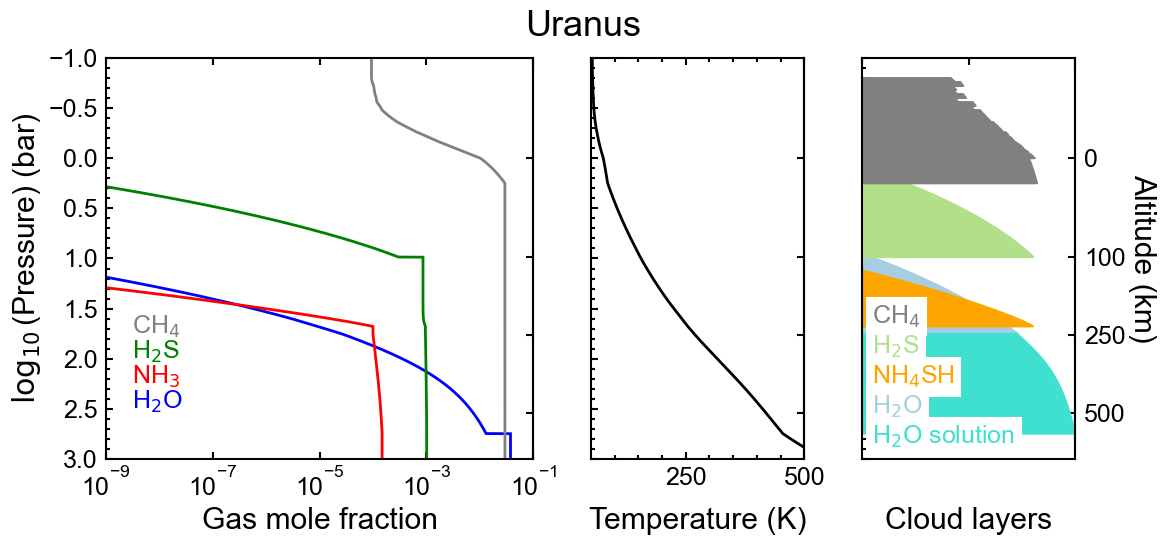

In [4]:
p_grid = np.logspace(2, 9, 10000)
uranus_gravity = 8.87  # m/s2 

# Load RO profile 
uranus_ro = np.loadtxt('../data/ro_profiles/uranus_voyager2_lindal1987.txt', skiprows=3, delimiter=',')
uranus_pressure = uranus_ro[:, 0] * 1e2  # Pa
uranus_temperature = uranus_ro[:, 1]
gases1 = eccm.solar_to_deep_mole_fraction(35) 
gases2 = eccm.solar_to_deep_mole_fraction(50) 
gases3 = eccm.solar_to_deep_mole_fraction(1) 

pressure_grid, temperature_grid, altitude_grid, \
x_h2o, x_nh3, x_h2s, x_ch4, x_ph3, x_h2, x_he, \
a_h2osolid, a_h2oliquid, a_h2osolution, \
a_nh3solid, a_nh3liquid, \
a_h2ssolid, a_h2sliquid, \
a_nh4sh, c_nh3h2o, \
a_ch4solid, a_ch4liquid, a_ph3solid  = eccm.eccm(p_grid, uranus_pressure, uranus_temperature, uranus_gravity,
                                                 gases1['H2O'], gases3['NH3'], gases1['H2S'], gases2['CH4'], 0., 0.85, 0.15,
                                                 h2s_rh=0.35, h2o_rh=0.35, latent_heat_update=True, force_reference_above_pressure=1.*spc.bar)


def p_to_z(x):
    return np.interp(x, np.log10(pressure_grid / spc.bar)[::-1], altitude_grid[::-1])

def z_to_p(x): 
    return np.interp(x, altitude_grid[::-1], np.log10(pressure_grid / spc.bar)[::-1])


gs = GridSpec(1, 3, width_ratios=[2, 1, 1], height_ratios=[1])


fig = plt.figure(figsize=(12, 6)) 
ax = fig.add_subplot(gs[1]) 
ax.plot(temperature_grid, np.log10(pressure_grid / spc.bar), color='k')
ax.set_xlabel('Temperature (K)', labelpad=12)
ax.set_ylim(-1, 3)
ax.set_xlim(50, 500)
ax.invert_yaxis()
ax.yaxis.set_tick_params(labelcolor='none')
ax.tick_params(right=False, which='both')
secax = ax.secondary_yaxis('right', functions=(p_to_z, z_to_p))
secax.set_yticks([-250, -100, 0, 100, 250, 500, 1000])
secax.tick_params(right=False, which='minor')
secax.yaxis.set_tick_params(labelcolor='none')

ax = fig.add_subplot(gs[0]) 
ax.plot(x_h2o, np.log10(pressure_grid / spc.bar), label='H$_2$O', color='b')
ax.plot(x_nh3, np.log10(pressure_grid / spc.bar), label='NH$_3$', color='r')
ax.plot(x_h2s, np.log10(pressure_grid / spc.bar), label='H$_2$S', color='g')
ax.plot(x_ch4, np.log10(pressure_grid / spc.bar), label='CH$_4$', color='gray')
# ax.plot(x_ph3, np.log10(pressure_grid / spc.bar), label='PH$_3$', color='purple')
ax.set_xlabel('Gas mole fraction')
ax.set_ylabel(r'$\log_{10}$(Pressure) (bar)')
ax.set_xscale('log')
ax.set_xlim(1e-9, 1e-1)
ax.set_ylim(-1, 3)
ax.invert_yaxis()
ax.tick_params(right=False, which='both')
secax = ax.secondary_yaxis('right', functions=(p_to_z, z_to_p))
secax.set_yticks([-250, -100, 0, 100, 250, 500, 1000])
secax.tick_params(right=False, which='minor')
secax.yaxis.set_tick_params(labelcolor='none')
ax.text(3e-9, 2.5, 'H$_2$O', color='b')
ax.text(3e-9, 2.25, 'NH$_3$', color='r')
ax.text(3e-9, 2., 'H$_2$S', color='g')
ax.text(3e-9, 1.75, 'CH$_4$', color='gray')


paired_cmap = plt.get_cmap('Paired')

ax = fig.add_subplot(gs[2]) 
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_h2osolid, label='H$_2$O solid', color=paired_cmap(0))
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_h2oliquid, label='H$_2$O liquid', color=paired_cmap(1))
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_h2osolution, label='H$_2$O solution', color='turquoise')
# ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_nh3solid, label='NH$_3$ solid', color=paired_cmap(4))
# ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_nh3liquid, label='NH$_3$ liquid', color=paired_cmap(5))
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_h2ssolid, label='H$_2$S solid', color=paired_cmap(2))
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_h2sliquid, label='H$_2$S liquid', color=paired_cmap(3))
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_ch4solid, label='CH$_4$ solid', color='gray')
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_ch4liquid, label='CH$_4$ liquid', color='k')
# ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_ph3solid, label='PH$_3$ solid', color='purple')
ax.fill_betweenx(np.log10(pressure_grid / spc.bar), 0., a_nh4sh, label='NH4SH', color='orange')
ax.set_xlabel('Cloud layers')
ax.set_xscale('log')
ax.set_ylim(-1, 3)
ax.set_xlim(1e-6, 10000)
ax.xaxis.set_tick_params(labelcolor='none')
ax.invert_yaxis()
ax.tick_params(bottom=False, right=False, which='both')
ax.yaxis.set_tick_params(labelcolor='none')
ax.text(3e-6, 2.85, 'H$_2$O solution', color='turquoise', backgroundcolor='white', zorder=5)
ax.text(3e-6, 2.55, 'H$_2$O', color=paired_cmap(0), backgroundcolor='white', zorder=4)
ax.text(3e-6, 2.25, 'NH$_4$SH', color='orange', backgroundcolor='white', zorder=3)
ax.text(3e-6, 1.95, 'H$_2$S', color=paired_cmap(2), backgroundcolor='white', zorder=2)
ax.text(3e-6, 1.65, 'CH$_4$', color='gray', backgroundcolor='white', zorder=1)


secax = ax.secondary_yaxis('right', functions=(p_to_z, z_to_p))
secax.set_ylabel('Altitude (km)', rotation=-90, labelpad=22) 
secax.yaxis.set_major_formatter(ticker.ScalarFormatter())
secax.set_yticks([-250, -100, 0, 100, 250, 500, 1000])
secax.tick_params(right=False, which='minor')

fig.suptitle('Uranus', y=0.92, fontsize='x-large')
fig.tight_layout(w_pad=-2) 
fig.savefig('uranus_eccm.png', dpi=300)





## Emission and angular spectrum, atmospheric weighting functions 

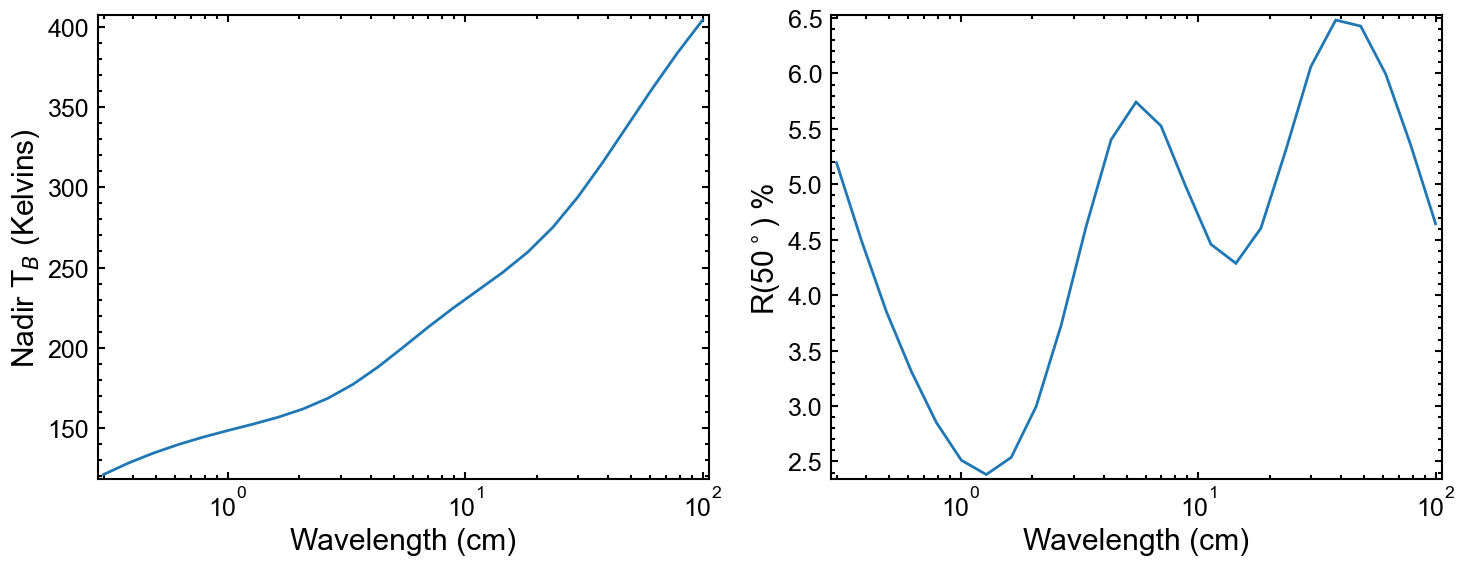

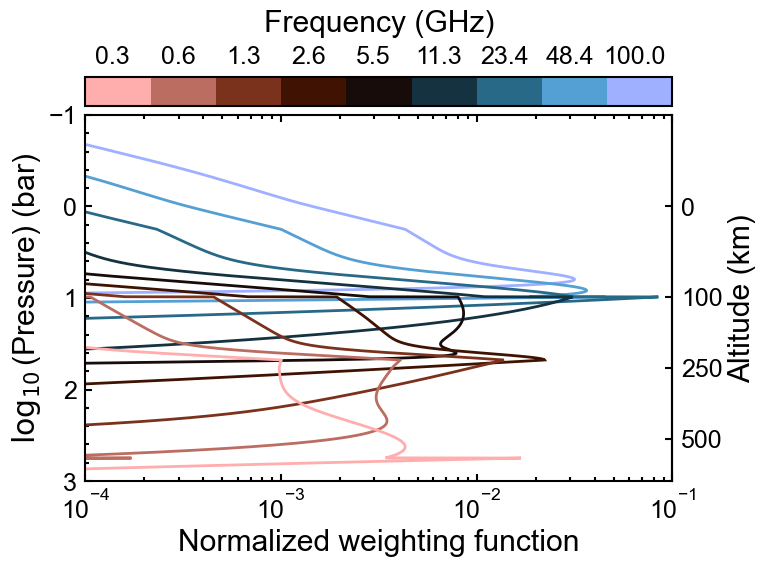

In [5]:
planet_radius = 25559  # Uranus

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
freq_ghz = 3e-1 / np.logspace(np.log10(3e-3), 0, 25)
wave_cm = spc.c / (freq_ghz * 1e9) * 1e2 

incang_deg = 0. 
# Don't need to use the full atmosphere grid
minloc = np.argmin(abs(pressure_grid / spc.bar - 1e-3))
maxloc = np.argmin(abs(pressure_grid / spc.bar - 1000e3))
slc = slice(maxloc, minloc, 3)
full_tau, weight_up, weight_limb, Tup, Tlimb = mrtm.mrtm(freq_ghz, incang_deg, altitude_grid[slc], pressure_grid[slc], temperature_grid[slc], x_h2o[slc], x_nh3[slc], x_h2s[slc], x_ch4[slc], x_ph3[slc], x_h2[slc], x_he[slc], planet_radius)
spec1 = Tup 
incang_deg = 50. 
full_tau, _, _, Tup, Tlimb = mrtm.mrtm(freq_ghz, incang_deg, altitude_grid[slc], pressure_grid[slc], temperature_grid[slc], x_h2o[slc], x_nh3[slc], x_h2s[slc], x_ch4[slc], x_ph3[slc], x_h2[slc], x_he[slc], planet_radius)
spec2 = Tup 
R50 = (spec1 - spec2) / spec1 * 1e2 

ax1.plot(wave_cm, spec1)
ax2.plot(wave_cm, R50)

ax1.set_xlabel('Wavelength (cm)')
ax2.set_xlabel('Wavelength (cm)')
ax1.set_ylabel('Nadir T$_B$ (Kelvins)')
ax2.set_ylabel(r'R(50$^\circ$) %')
ax1.set_xscale('log')
ax2.set_xscale('log')
fig.tight_layout()


fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1) 

# Colormap setup
freqs = freq_ghz[::3]  # Only using every third frequency
n_colors = len(freqs)
cmap = plt.get_cmap('berlin_r', n_colors)  # Discrete version of colormap
log_edges = np.logspace(np.log10(freqs.min()) - 0.01, np.log10(freqs.max()) + 0.01, n_colors + 1)
norm = colors.BoundaryNorm(log_edges, ncolors=n_colors)

for i, wup in enumerate(weight_up):
    if not i % 3:
        freq = freq_ghz[i]
        color = cmap(norm(freq))
        ax.semilogx(wup, np.log10(pressure_grid[slc] / spc.bar), color=color)

ax.set_xlabel('Normalized weighting function')
ax.set_ylabel(r'$\log_{10}$(Pressure) (bar)')
ax.set_ylim(-1, 3)
ax.set_xlim(1e-4, 1e-1)
ax.invert_yaxis()
ax.tick_params(right=False, which='both')
secax = ax.secondary_yaxis('right', functions=(p_to_z, z_to_p))
secax.set_ylabel('Altitude (km)') 
secax.yaxis.set_major_formatter(ticker.ScalarFormatter())
secax.set_yticks([-250, -100, 0, 100, 250, 500, 1000])
secax.tick_params(right=False, which='minor')


# Colorbar 
tick_locs = np.sqrt(log_edges[:-1] * log_edges[1:])
tick_labels = ['{:.1f}'.format(f) for f in freqs[::-1]]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(
    sm, ax=ax, orientation='horizontal', location='top', pad=0.02,
    boundaries=log_edges, ticks=tick_locs
)
cbar.set_label('Frequency (GHz)', labelpad=10)
cbar.ax.set_xticklabels(tick_labels)

fig.tight_layout() 
fig.savefig('uranus_weightfunction.png', dpi=300)



